In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import cv2
from tensorflow.keras import layers

In [2]:
img = image.load_img("C:\\Users\\SPECTRE\\Desktop\\PES\\Semester 3\\Mini Project\\training\\Dogs\\1.JPG")

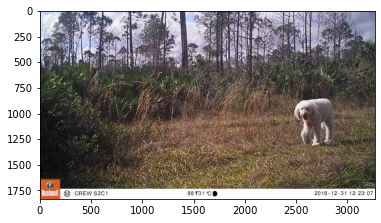

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("C:\\Users\\SPECTRE\\Desktop\\PES\\Semester 3\\Mini Project\\training\\Dogs\\1.JPG").shape

(1832, 3264, 3)

In [5]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = train.flow_from_directory("C:\\Users\\SPECTRE\\Desktop\\PES\\Semester 3\\Mini Project\\training",
                                          target_size = (200,200),
                                          batch_size = 100,
                                          class_mode = 'binary'
)

validation_dataset =train.flow_from_directory("C:\\Users\\SPECTRE\\Desktop\\PES\\Semester 3\\Mini Project\\validation",
                                          target_size = (200,200),
                                          batch_size = 20,
                                          class_mode = 'binary')

Found 322 images belonging to 2 classes.
Found 54 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'Coyotes': 0, 'Dogs': 1}

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation ='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    
                                    tf.keras.layers.Dense(1,activation='sigmoid')                       
                                   ])

In [9]:
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.002),
             metrics=['accuracy'])

In [10]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch =3,
                     epochs = 40,
                     validation_data=validation_dataset)

Epoch 1/40
3/3 [==============================] - 42s 18s/step - loss: 101.4866 - accuracy: 0.5225 - val_loss: 9.1396 - val_accuracy: 0.5000
Epoch 2/40
3/3 [==============================] - 36s 11s/step - loss: 2.8202 - accuracy: 0.5676 - val_loss: 0.6273 - val_accuracy: 0.7037
Epoch 3/40
3/3 [==============================] - 36s 17s/step - loss: 0.9350 - accuracy: 0.4865 - val_loss: 0.5465 - val_accuracy: 0.5741
Epoch 4/40
3/3 [==============================] - 43s 15s/step - loss: 0.5028 - accuracy: 0.6800 - val_loss: 0.8226 - val_accuracy: 0.6111
Epoch 5/40
3/3 [==============================] - 34s 10s/step - loss: 0.4891 - accuracy: 0.7658 - val_loss: 2.1747 - val_accuracy: 0.5000
Epoch 6/40
3/3 [==============================] - 34s 10s/step - loss: 1.7667 - accuracy: 0.5315 - val_loss: 0.6232 - val_accuracy: 0.9074
Epoch 7/40
3/3 [==============================] - 40s 11s/step - loss: 0.5878 - accuracy: 0.7838 - val_loss: 1.0982 - val_accuracy: 0.5000
Epoch 8/40
3/3 [=========

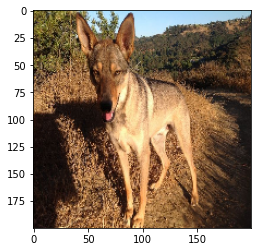

Model prediction is a Dog


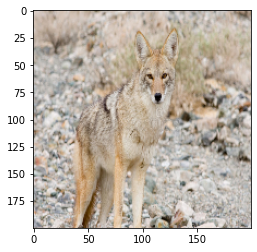

Model prediction is a Dog


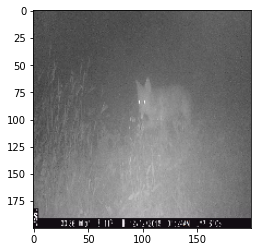

Model prediction is a Dog


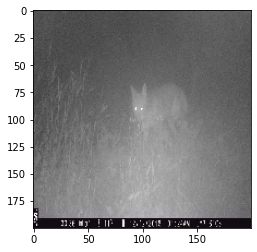

Model prediction is a Dog


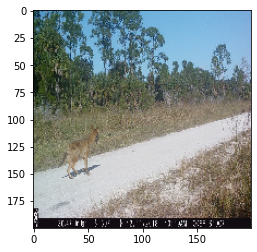

Model prediction is a Coyote


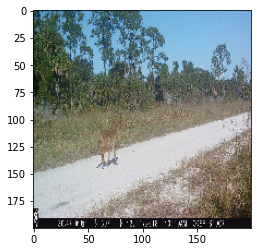

Model prediction is a Coyote


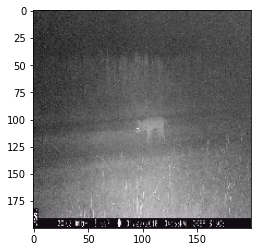

Model prediction is a Dog


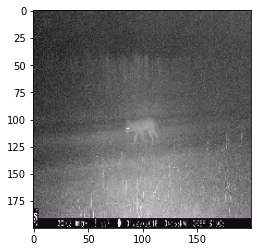

Model prediction is a Dog


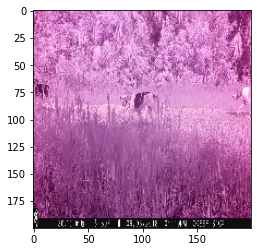

Model prediction is a Dog


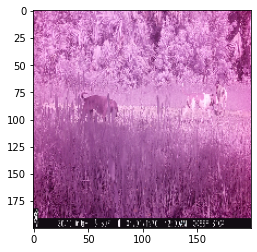

Model prediction is a Dog


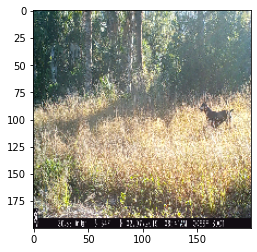

Model prediction is a Dog


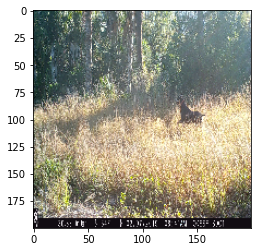

Model prediction is a Dog


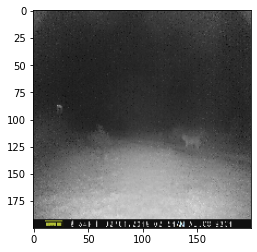

Model prediction is a Dog


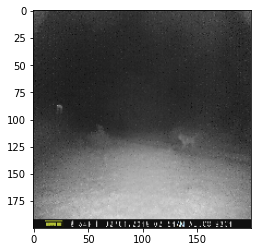

Model prediction is a Dog


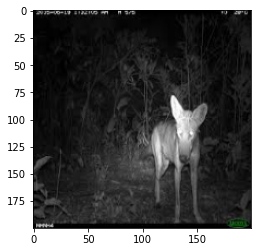

Model prediction is a Coyote


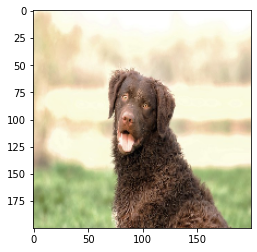

Model prediction is a Dog


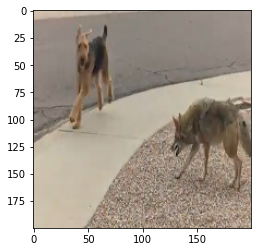

Model prediction is a Dog


In [11]:
dir_path = 'testing'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path +'//' + i)
    img = np.asarray(img)
    img = cv2.resize(img,(200,200))
    plt.imshow(img)
    plt.show()
    
    X = np.expand_dims(img,axis = 0)
    images= np.vstack([X])
    val = model.predict(images)
    
    if val == 0:
        print("Model prediction is a Coyote")
    else:
        print("Model prediction is a Dog")

In [13]:
loss, accuracy = model.evaluate(train_dataset, verbose=1)
loss_v, accuracy_v = model.evaluate(validation_dataset, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model.save("model.h5")

3/3 [==============================] - 7s 2s/step - loss: 0.1792 - accuracy: 0.8519
Validation: accuracy = 0.851852  ;  loss_v = 0.179171
Test: accuracy = 0.891304  ;  loss = 0.147243
